In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

daily_auckland_weather = pd.read_csv("../Data/motatstation_weather_auckland_2016_2024.csv", index_col='Date', parse_dates=True)
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8


In [120]:
daily_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [121]:
print(daily_auckland_weather.head())
print(daily_auckland_weather.tail())

            WDir(Deg)  WSpd(m/s)  GustDir(Deg)  GustSpd(m/s)  WindRun(Km)  \
Date                                                                        
2016-03-01      188.0        1.2          65.0           7.2        172.0   
2016-03-02      157.0        3.2          60.0           9.3        258.0   
2016-03-03      134.0        1.9          67.0          10.8        214.0   
2016-03-04      147.0        1.3          38.0           6.2        134.0   
2016-03-05      131.0        0.4         197.0           9.3        187.0   

            Rain(mm)  Tdry(c)  Twet(c)  RH(%)  Tmax(c)  ...  ET10©  ET20©  \
Date                                                    ...                 
2016-03-01       1.8     19.2     18.5   93.0     22.4  ...   21.3   22.2   
2016-03-02       0.0     17.9     16.1   82.0     23.5  ...   20.4   21.7   
2016-03-03       0.0     18.3     15.7   75.0     23.1  ...   19.5   20.9   
2016-03-04       0.0     19.4     16.1   69.0     24.8  ...   19.9   21.2  

In [122]:
daily_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [123]:
daily_auckland_weather.index.freq

<Axes: xlabel='Date'>

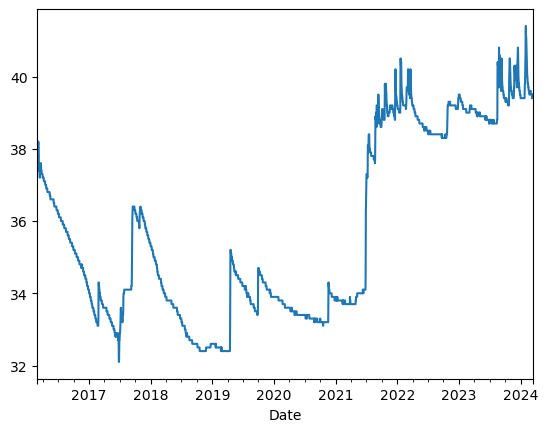

In [124]:
soilmoist = daily_auckland_weather['SoilMoist(%)']
soilmoist.plot()


## Train Test Split

In [125]:
len(daily_auckland_weather)

2939

In [126]:
daily_auckland_weather.head(3)

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6


In [127]:
daily_auckland_weather.tail(3)

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-15,194.0,3.1,310.0,8.7,179.0,7.0,17.1,16.6,95.0,19.7,...,19.5,19.9,20.0,1005.9,1004.0,0.0,5.50,18.25,2.3,39.4
2024-03-16,219.0,3.1,216.0,11.9,244.0,0.0,16.2,12.5,63.0,19.7,...,17.6,18.9,19.8,1010.8,1008.9,10.7,21.19,16.20,3.6,39.4
2024-03-17,160.0,0.5,210.0,7.7,157.0,0.0,12.8,12.3,94.0,21.0,...,15.6,17.5,20.0,1017.5,1015.6,6.1,11.82,14.25,2.0,39.4


In [128]:
2925 * 0.85

2486.25

In [129]:
daily_motat = daily_auckland_weather.loc['2024-01-01':]

In [130]:
daily_motat = daily_auckland_weather.round(2)

In [158]:
test_days = 7

In [159]:
train = daily_motat.iloc[:-test_days]
test = daily_motat.iloc[-test_days:]

In [160]:
train

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-06,217.0,2.8,211.0,11.2,205.0,0.0,17.2,13.9,67.0,21.2,...,17.8,18.9,20.2,1017.9,1016.0,9.3,17.89,17.85,4.7,39.5
2024-03-07,290.0,0.8,279.0,7.3,168.0,0.2,15.7,13.9,81.0,21.8,...,17.3,18.3,20.3,1023.8,1021.9,0.1,9.67,15.90,1.8,39.5
2024-03-08,242.0,1.4,229.0,8.8,222.0,0.0,18.9,17.1,83.0,23.8,...,18.2,18.9,20.3,1021.4,1019.5,7.5,14.73,19.60,2.2,39.5


In [161]:
test

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-11,291.0,1.5,231.0,12.4,302.0,0.2,18.6,17.5,89.0,23.3,...,17.5,18.4,20.0,1025.1,1023.2,6.5,16.78,17.90,2.3,39.5
2024-03-12,290.0,0.6,237.0,6.8,109.0,7.2,19.0,18.5,95.0,22.3,...,18.9,19.0,19.9,1017.5,1015.6,2.3,7.56,19.95,1.9,39.4
2024-03-13,216.0,1.2,230.0,9.9,214.0,0.2,20.2,19.3,91.0,24.7,...,19.7,19.6,19.8,1012.7,1010.8,5.1,14.13,21.80,0.8,39.4
2024-03-14,254.0,1.4,286.0,7.7,256.0,0.6,19.3,18.8,95.0,25.2,...,19.1,19.4,19.9,1011.8,1009.9,6.7,15.45,20.10,1.9,39.4
2024-03-15,194.0,3.1,310.0,8.7,179.0,7.0,17.1,16.6,95.0,19.7,...,19.5,19.9,20.0,1005.9,1004.0,0.0,5.50,18.25,2.3,39.4
2024-03-16,219.0,3.1,216.0,11.9,244.0,0.0,16.2,12.5,63.0,19.7,...,17.6,18.9,19.8,1010.8,1008.9,10.7,21.19,16.20,3.6,39.4
2024-03-17,160.0,0.5,210.0,7.7,157.0,0.0,12.8,12.3,94.0,21.0,...,15.6,17.5,20.0,1017.5,1015.6,6.1,11.82,14.25,2.0,39.4


## Scale Data

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [163]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time Series Generator

In [164]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# define generator
length = 7 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [165]:
X,y = generator[0]

In [166]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.52222222 0.81107613 0.17827298 0.90544554 0.22572178 0.00836431
 0.74789916 0.75770925 0.875      0.63507109 0.81481481 0.88560886
 0.77722772 0.82634731 0.91262136 0.59800664 0.59833333 0.09285714
 0.16913319 0.74673629 0.1        0.56989247 0.43611111 0.84812002
 0.1643454  0.91584158 0.33858268 0.         0.69327731 0.65198238
 0.67857143 0.68720379 0.75720165 0.77490775 0.73267327 0.79640719
 0.91262136 0.67940199 0.68       0.54285714 0.43521595 0.73890339
 0.2        0.59139785 0.37222222 0.82404149 0.18384401 0.92326733
 0.2808399  0.         0.71008403 0.63436123 0.55357143 0.66824645
 0.6872428  0.67158672 0.68811881 0.74850299 0.91262136 0.82392027
 0.825      0.67142857 0.59951676 0.68407311 0.46666667 0.59139785
 0.40833333 0.81292832 0.10306407 0.90049505 0.17585302 0.
 0.75630252 0.65198238 0.44642857 0.74881517 0.65020576 0.59409594
 0.70792079 0.76646707 0.9223301  0.81727575 0.81833333 0.66428571
 0.56146179 0.70496084 0.46666667 0.60215054 0.36388

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [168]:
scaled_train.shape

(2932, 22)

In [169]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [170]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100)            │        49,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 22)             │         2,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,422 (200.87 KB)

 Trainable params: 51,422 (200.87 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)


In [172]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=batch_size)

ValueError: `start_index+length=7 > end_index=6` is disallowed, as no part of the sequence would be left to be used as current step.

In [ ]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

AttributeError: 'Sequential' object has no attribute 'fit_generator'